# Part I - (Loan Data From Prosper)
## by (Olamide Ige)

## Introduction
> Introduce the dataset
>
> #### This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others






## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
loan_dataset = pd.read_csv('prosperLoanData.csv')

print(loan_dataset.shape)
print(loan_dataset.dtypes)
print(loan_dataset.columns)
print(loan_dataset.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScor

In [3]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> There are 113,937 rows with 81 variables such as Term(length of the loan), Occupation, EmploymentStatus, EmploymentStatusDuration, ProsperRating etc. Most variables are numeric and categorical in nature.
### What is/are the main feature(s) of interest in your dataset?

> - What are the factors are best for predicting the borrower's Annual Percentage Rate (APR) for the loan?
> - What variable(s) that affect Prosper Rating score?
> - Which loan types are most frequently collected from Prosper?
> - What line of work collects the most loans?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
> - ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
> - Occupation: The Occupation selected by the Borrower at the time they created the listing.
> - EmploymentStatus: The employment status of the borrower at the time they posted the listing.
> - ListingCategory: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
> - IncomeRange: The income range of the borrower at the time the listing was created.

## Univariate Exploration


###  What is the distribution of the BorrowerAPR?

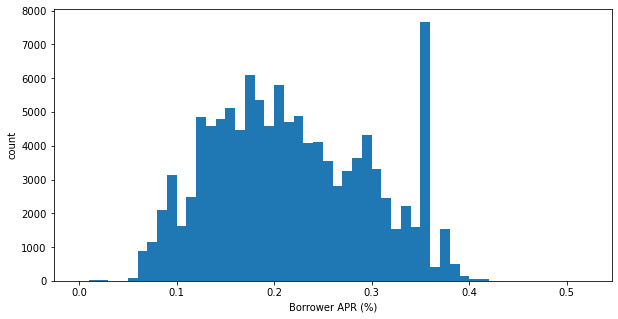

In [4]:
#setting the base color
base_color = sns.color_palette()[0]
#setting the bins
bins = np.arange(0, loan_dataset['BorrowerAPR'].max() + 0.01, 0.01)
#plotting 
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(data=loan_dataset, x='BorrowerAPR', color=base_color, bins=bins)
ax.set_xlabel('Borrower APR (%)')
ax.set_ylabel('count')
plt.show()

#### Observations

1. The distribution of the BorrowerAPR looks multimodal because it has three or more peaks which occurs at 0.1%, 0.2%, 0.3%, around 0.36%

2. Only few loans have APR less 0.06% and above 0.43%

In [5]:
# Creating a seaborn countplot Function
def countplot(data, x, x_label=None, y_label=None, order=None, hue=None, figsize=None,rotation=None,
              color=None, title=None,):
    """
    This Fuctions create a seaborn countplot
        
        Parameters:
                data: Dataframe, array, or list of arrays, compulsory
                x: Name of a variable in the data, optional
                x_label: Title of the x-axis, optional
                y_label: Title of the y-axis, optional
                figsize: The size of the plot
                rotation: Rotation of the x-axis
                color: Color for all of the elements, or seed for a gradient palette, optional
                title: The title of the plot, optional
        
        Returns: ax matplotlib Axes
                Returns the Axes object with the plot drawn onto it.
                
    """
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.countplot(x=x, data=data, color=color, order=order,)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, size=20)
    plt.xticks(rotation=rotation)
    plt.show()

###  Which prosper score ratings are the most popular?

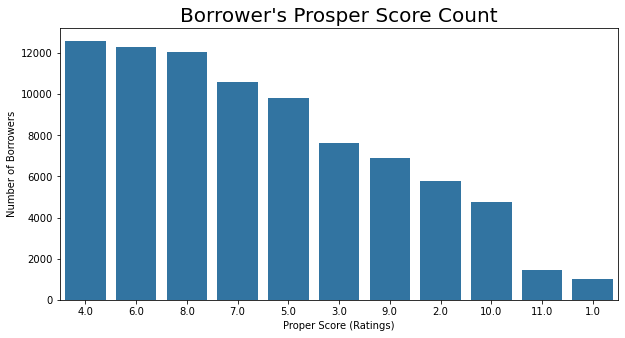

In [6]:
score_order = loan_dataset['ProsperScore'].value_counts().index
countplot(figsize=(10,5), data=loan_dataset, x='ProsperScore', color=base_color, order=score_order,
          x_label='Proper Score (Ratings)', y_label='Number of Borrowers',title="Borrower's Prosper Score Count")

#### Observation

1. Most of the borrowers were given a rating score between the range of 4 - 8
2. The score point of 4 is the highest score given the borrowers
3. This figure demonstrates that the majority of the loans issued by Prosper are high risk loans.

### What are the most common occupation held by prosper borrowers?

Most of the borrowers listed their occupation as Other and Professional. We have to exclude them from the analysis

In [7]:
loan_dataset['Occupation'].value_counts().head(15)

Other                       28617
Professional                13628
Computer Programmer          4478
Executive                    4311
Teacher                      3759
Administrative Assistant     3688
Analyst                      3602
Sales - Commission           3446
Accountant/CPA               3233
Clerical                     3164
Sales - Retail               2797
Skilled Labor                2746
Retail Management            2602
Nurse (RN)                   2489
Construction                 1790
Name: Occupation, dtype: int64

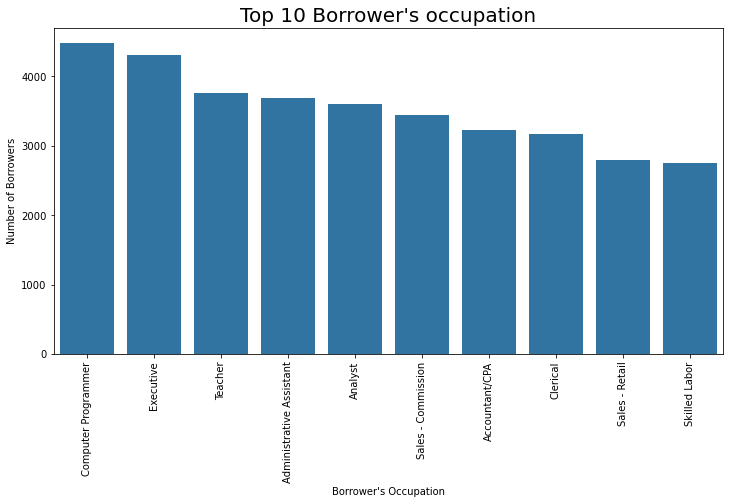

In [8]:
#Creating a list for the top 10 occupation
top_occupation = ['Computer Programmer', 'Executive', 'Teacher', 'Administrative Assistant', 'Analyst',
                 'Sales - Commission', 'Accountant/CPA', 'Clerical', 'Sales - Retail','Skilled Labor']

#Subsetting for the top 10 occupation
occup_sub = loan_dataset.loc[loan_dataset['Occupation'].isin(top_occupation)]

order = occup_sub['Occupation'].value_counts().index

#creating a count plot with the countplot function
countplot(figsize=(12,6), data=occup_sub, x='Occupation', color=base_color, x_label="Borrower's Occupation",
         y_label='Number of Borrowers', rotation=90, title="Top 10 Borrower's occupation", order=order)

#### Observation

1. The largest borrower on Prosper are computer programmers followed by Excetive and Teachers which makes up the top three.

### Investigating the employment status of prosper borrowers?

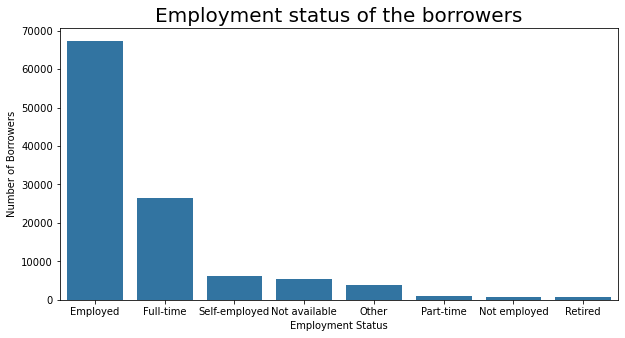

In [9]:
status_order = loan_dataset['EmploymentStatus'].value_counts().index
#plotting countplot with the countplot function
countplot(figsize=(10,5), data=loan_dataset, x='EmploymentStatus', color=base_color, x_label="Employment Status",
         y_label='Number of Borrowers', title='Employment status of the borrowers', order = status_order)

#### Observation

The majority of borrowers are employed, which makes sense given how difficult it is to obtain a loan without employment.

### Which loan categories is most selected when applying for loan?

In [10]:
loan_dataset['ListingCategory (numeric)'].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12], dtype=int64)

In [11]:
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

# Adding listing category to the dataframe and converting to category datatype
loan_dataset['ListingCategory'] = loan_dataset['ListingCategory (numeric)'].replace(list_dict).astype('category')
#Dropping the 'ListingCategory (numeric)' column
loan_dataset.drop('ListingCategory (numeric)', axis=1, inplace=True)

In [12]:
#Confirming the changes
loan_dataset['ListingCategory'].unique()

['Not Available', 'Home Improvement', 'Motorcycle', 'Debt Consolidation', 'Other', ..., 'Student Use', 'Boat', 'RV', 'Cosmetic Procedure', 'Green Loans']
Length: 21
Categories (21, object): ['Auto', 'Baby&Adoption', 'Boat', 'Business', ..., 'Student Use', 'Taxes', 'Vacation', 'Wedding Loans']

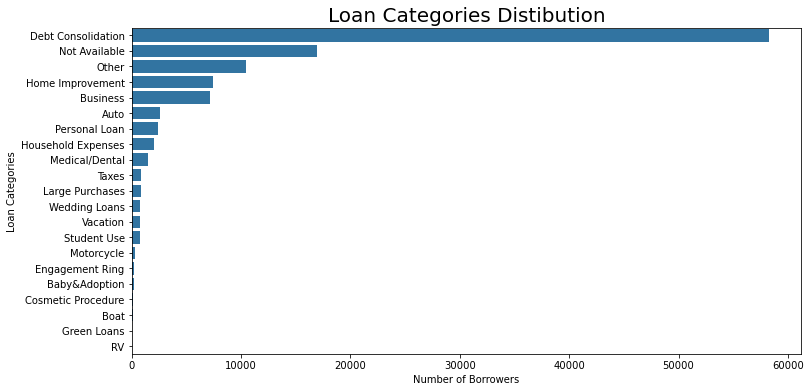

In [13]:
list_order = loan_dataset['ListingCategory'].value_counts().index
#plotting
plt.figure(figsize=[12, 6])
sns.countplot(data=loan_dataset, y='ListingCategory', color=base_color, order=list_order)
plt.xlabel('Number of Borrowers')
plt.ylabel('Loan Categories')
plt.title('Loan Categories Distibution', size=20)
plt.show()

#### Observation

The most common loan type obtained by debtors is debt consolidation. This relates to the reason why the majority of Prosper borrowers have lower prosper score ratings.

### Investigating the income range of borrowers at prosper loan?

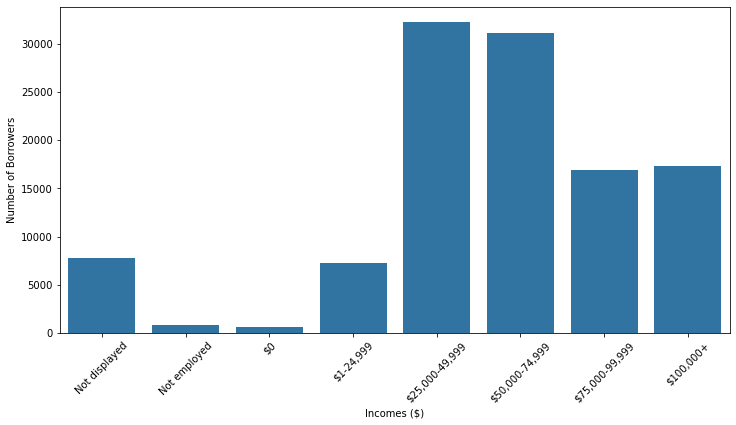

In [14]:
# The income variable is an ordinal variable so we have to arrange it
income_cat = ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999',
               '$50,000-74,999', '$75,000-99,999', '$100,000+']
income_order = pd.api.types.CategoricalDtype(ordered=True, categories=income_cat)
loan_dataset['IncomeRange'] = loan_dataset['IncomeRange'].astype(income_order)
#plotting with the count function
countplot(figsize=(12,6), data=loan_dataset, x='IncomeRange', color=base_color, rotation=45, 
         x_label='Incomes ($)', y_label = 'Number of Borrowers')

#### Observation 

Most of the Prosper's borrowers income range falls with in the range of 25,000 - 49,999 followed by 50,000-74,999

### Investigating the distribution of the orignal loan amount collected by borrowers?

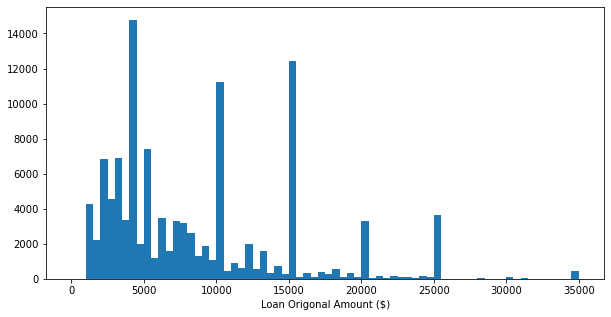

In [15]:
bins_size = np.arange(0, loan_dataset['LoanOriginalAmount'].max()+500, 500)
plt.figure(figsize=(10,5))
plt.hist(data=loan_dataset, x='LoanOriginalAmount', bins=bins_size);
plt.xlabel('Loan Origonal Amount ($)')
plt.show()

The distribution is right skewed, so let's put it on a log scale to try to normalized the data

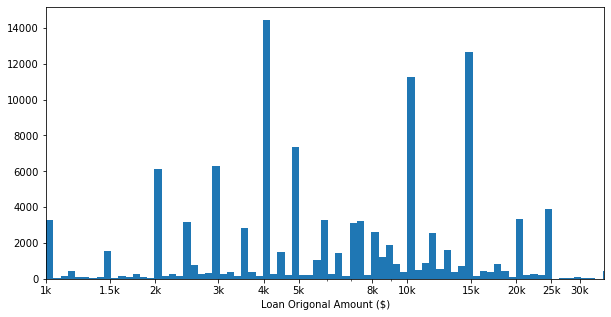

In [16]:
bins_size = 10 ** np.arange(0, np.log10(loan_dataset['LoanOriginalAmount'].max())+0.020, 0.020)
plt.figure(figsize=(10,5))
plt.hist(data=loan_dataset, x='LoanOriginalAmount', bins=bins_size);
plt.xscale('log')
x_ticks = [1000, 1500, 2000, 3000, 4000, 5000, 8000, 10000, 15000, 20000, 25000, 30000]
labels = ['1k', '1.5k', '2k', '3k', '4k', '5k', '8k', '10k', '15k', '20k', '25k', '30k']
plt.xticks(x_ticks, labels)
plt.xlim(1000, 35000)
plt.xlabel('Loan Origonal Amount ($)')
plt.show()

#### Observation:

Loan Original Amount was right skewed when plotted with a few data at the right end. When plotted on a log scale, we can see three high peaks at 4k, 10k, 15k which indicates that these are the loan amount that borrowers collects from Prosper Loan.


### Investigating the debt to income ratio of the borrowers?

In [17]:
loan_dataset['DebtToIncomeRatio'].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

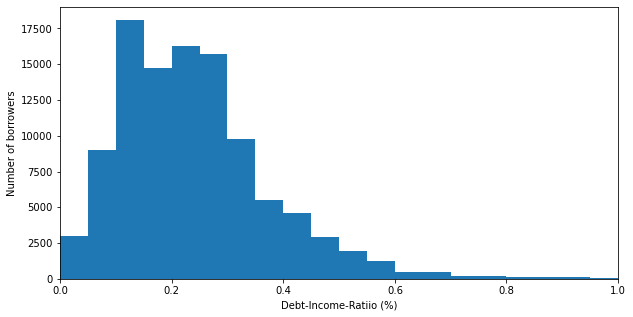

In [18]:
bins = np.arange(0, loan_dataset['DebtToIncomeRatio'].max()+0.05, 0.05)
plt.figure(figsize=(10,5))
plt.hist(data=loan_dataset, x='DebtToIncomeRatio', bins=bins)
plt.xlabel('Debt-Income-Ratiio (%)')
plt.ylabel('Number of borrowers')
plt.xlim(0, 1)
plt.show()

#### Observation

The debt-to-income (DTI) ratio is the percentage of your gross monthly income that goes to paying your monthly debt payments. A low debt-to-income (DTI) ratio demonstrates a good balance between debt and income
Most of Prosper Loan borrowers have a debt ratio of around 30% which is a relatively a DTI

### Investigating the Number of Current Credit lines of the borrowers?

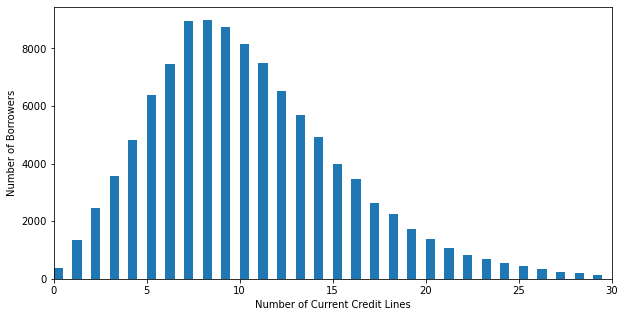

In [19]:
plt.figure(figsize=(10,5))
bins = np.arange(0, loan_dataset['CurrentCreditLines'].max()+0.5, 0.5)
plt.hist(data=loan_dataset, x='CurrentCreditLines', bins=bins)
plt.xlabel('Number of Current Credit Lines')
plt.ylabel('Number of Borrowers')
plt.xlim(0, 30)
plt.show()

#### Observation

Number of current credit lines at the time the credit profile was pulled. Most of Prosper borrowers have between 6 to 10 current credit lines 

### Investigation Into the Monthly Income of Prosper borrowers?

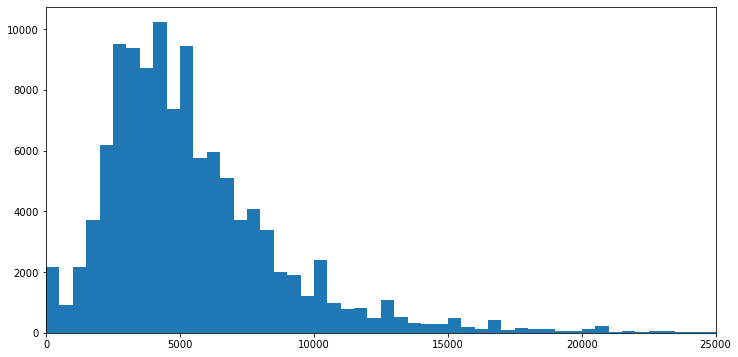

In [20]:
bins = np.arange(0, loan_dataset['StatedMonthlyIncome'].max()+500, 500)
plt.figure(figsize=(12,6))
plt.hist(data=loan_dataset, x='StatedMonthlyIncome', bins=bins);
plt.xlim(0,25000)
plt.show()

#### Observation

Most of Prosper borrowers monthly income is below 10000 dollars

### Investigation into the Borrower's interest rate on loan?

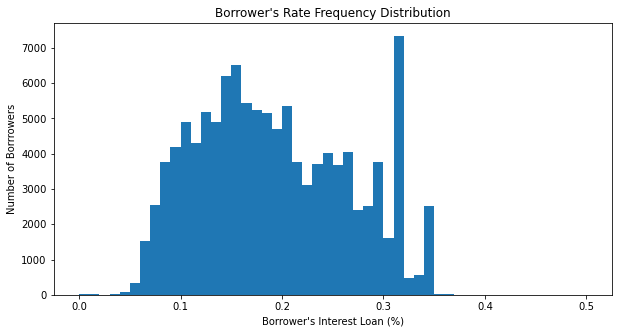

In [21]:
plt.figure(figsize=(10,5))
bins = np.arange(0, loan_dataset['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data=loan_dataset, x='BorrowerRate', bins=bins)
plt.xlabel("Borrower's Interest Loan (%)")
plt.ylabel("Number of Borrrowers")
plt.title("Borrower's Rate Frequency Distribution")
plt.show()

#### Obersevation

1. The Histgoram looks identical like the borrower's APR
2. The highest peak is little over 30% which signifies the frequent interest rate on loan

### Invesigating the Terms of loan?

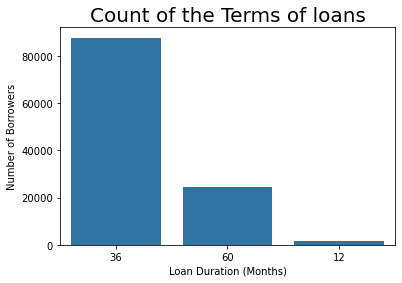

In [22]:
#Plotting seaborn countplot with the countplot function
term_order = loan_dataset['Term'].value_counts().index
countplot(data=loan_dataset, x='Term', color=base_color, x_label="Loan Duration (Months)",
          y_label=('Number of Borrowers'), title='Count of the Terms of loans', order=term_order)

#### Observation

The most frequent terms of loan is 36 months (medium-term), followed by 60 months (long-term) and 12 month (short term)



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>The distribution of borrowers APR looks multimodal. Most of the values are at the range of 0.05 and 0.4. There are no unusual points and no need to perform any transformation
>
>The Original Loan Amount was right skewed with few data at the right end. After using a log transformation. We could see three high peaks at 4k, 10k and 15k


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> while investigating the Listing Category variable, I noticed that the loan category was categorized in numeric value. i had to transform the listing category by replacing the numeric values with the actual loan category and i dropped the listing category with the numeric values
> 
>When I looked into the Occupation variable, I saw that the majority of borrowers had left this information blank. The majority of borrowers listed their occupations as professional and other. I have to exclude other people and professionals from the count plot in order to arrive at a more meaningful decision
>
>When investigating the Income range variable, I noticed that the data is an ordinal data but it was not orderd. I had to change the form of the data by converting the data to ordinal type

## Bivariate Exploration

> To start off with, I want to look at the pairwise correlations present between the numerical and categorical features in the data.

In [23]:
numerical_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'DebtToIncomeRatio', 
            'CurrentCreditLines', 'StatedMonthlyIncome', 'BorrowerRate',]
categoric_vars = ['EmploymentStatus', 'ProsperScore', 'IncomeRange']

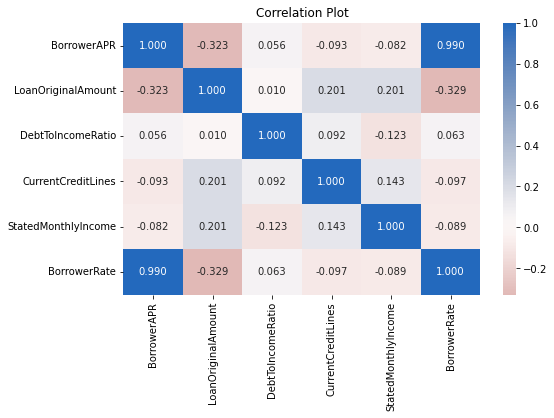

In [24]:
#Correlation Plot
plt.figure(figsize=(8,5))
sns.heatmap(loan_dataset[numerical_vars].corr(), annot=True, fmt='.3f',
           cmap='vlag_r', center=0)
plt.title('Correlation Plot')
plt.show()

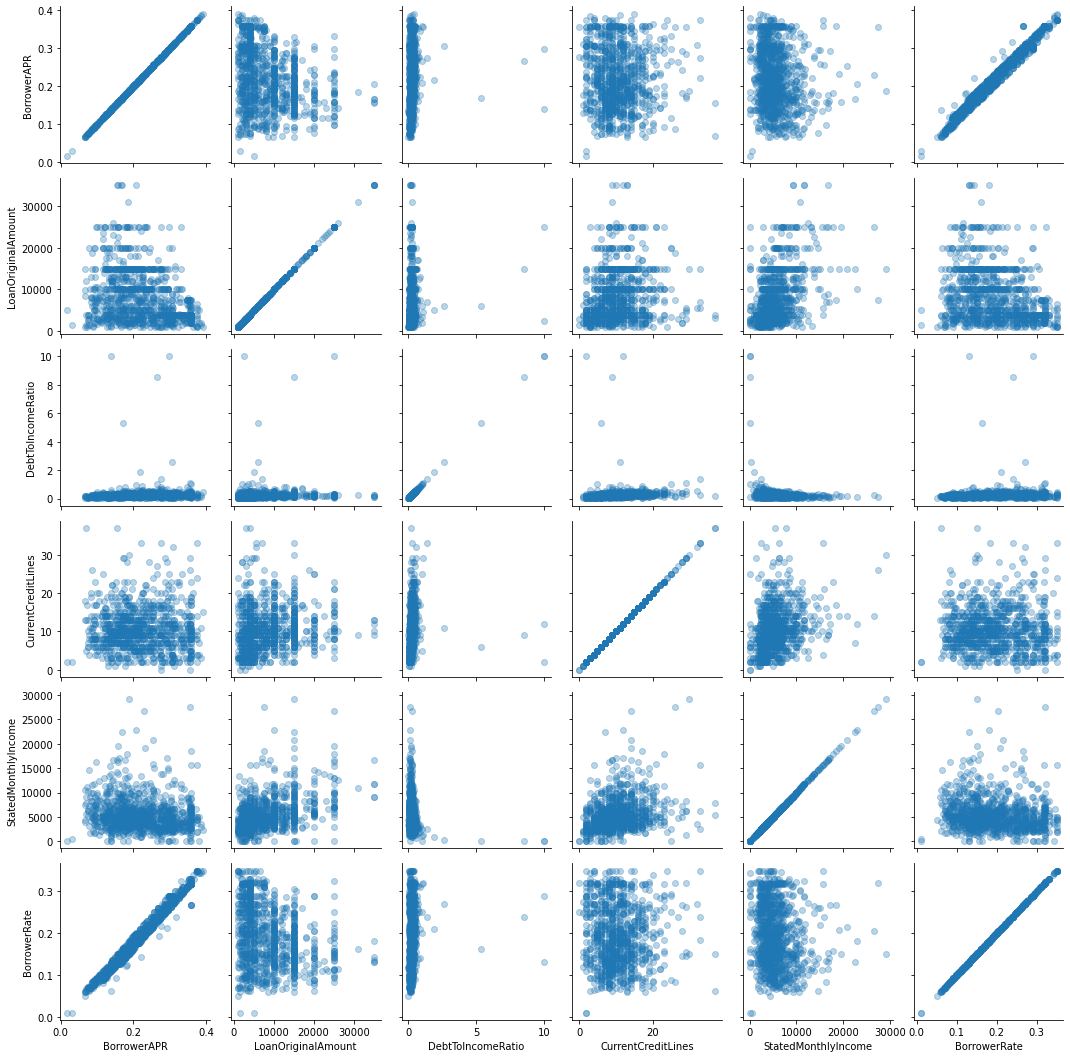

In [25]:
# plot matrix: sample 1000 diamonds so that plots are clearer and they render faster
sample = loan_dataset.sample(n=1000, replace=False)

g = sns.PairGrid(data = sample, vars=numerical_vars)
g.map(plt.scatter, alpha=0.3);

#### Observation

1. The correlation between BorrowerAPR and BorrowerRate is 0.99, which indicates that they are strongly positive correlatively. Higher BorrowerAPR rate is strongly related to higher BorrowerRate rate
2. The stated Monthly Income and Loan Original Amount have a 0.20 correlation, which is a moderately positive correlation. The loan amount increases as monthly income does.
3. The correlation between BorrowerAPR and Loan Original Amount is -0.32, which is a moderately negative correlection. The higher the loan amount fee, the Lower the BorrowerAPR and the lower the loan amount fee. the higher the BorrowerAPR


Investigating the correlation between the numerical variables(BorrowerAPR & LoanOrignalAmount) with the categorical variables (EmploymentStatus, ProperScore, IncomeRange)

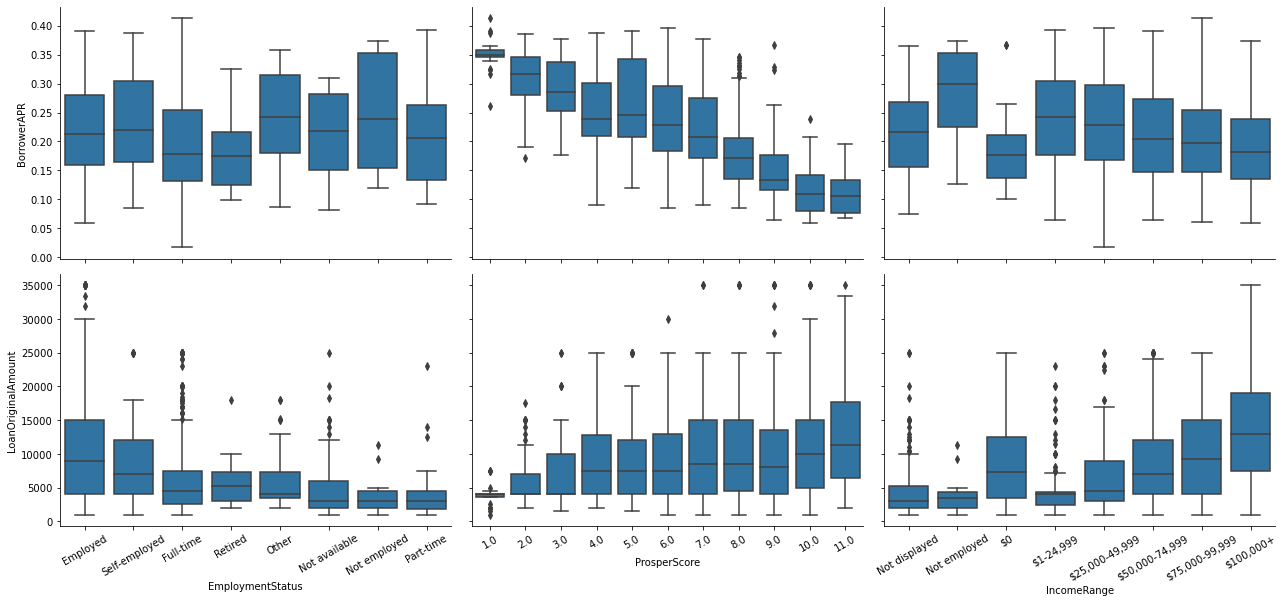

In [26]:
# Using a sample dataset of 2000 inorder to avoid overplotting 
loan_sample = loan_dataset.sample(n=3000, replace=False)

# plt.figure(figsize=[10,10])

def boxplot(x, y, **kwargs):
    """
    This function helps create a seaborn Boxplot
    """
    base_colour = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=base_color)
    plt.xticks(rotation=30)

   
g = sns.PairGrid(data = loan_sample, x_vars = categoric_vars, y_vars =['BorrowerAPR', 'LoanOriginalAmount'],
                height= 4, aspect=1.5)
g.map(boxplot)
plt.show()

#### Observation:
There are some negative relationship between the categorical variables and the numerical variables. Borrowers with low ratings tends to have higher BorrowerAPR rate and Borrowers with high ratings tends to have lower BorrowerAPR rate. Borrowers with Low income also tends to have higher BorrowerAPR rate while borrowers with high income tends to have lower BorrowerAPR rate.

There is positve relationship between Income range and Loan Amount. Borrowers with high income tends to borrows more money than borrowers with low income. Also Borrowers with high prosper score ratings tends to have access to higher loan than borroers wit low prosper score ratings 

Investigating the relationship between the categorical variables

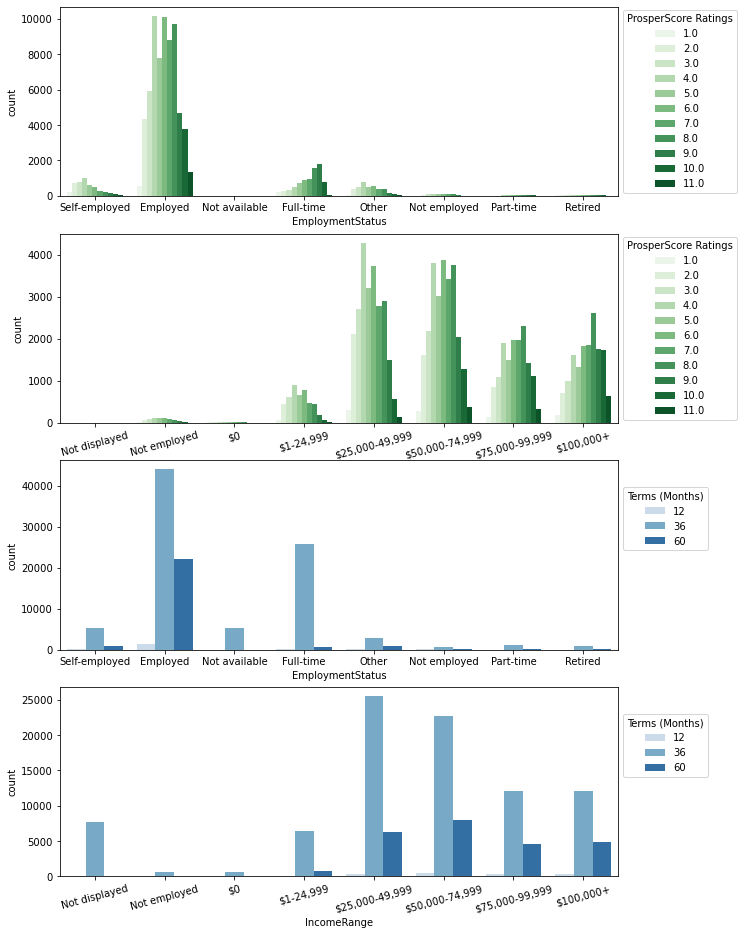

In [27]:
plt.figure(figsize=[10,16])

#subplot 1 Employemt Status vs Prosper Score rating
plt.subplot(4, 1, 1)
sns.countplot(data=loan_dataset, x='EmploymentStatus', hue='ProsperScore', palette='Greens');
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title='ProsperScore Ratings');

#subplot 2 Income Range vs Prosper Score rating
plt.subplot(4, 1, 2)
sns.countplot(data=loan_dataset, x='IncomeRange', hue='ProsperScore', palette='Greens');
plt.xticks(rotation=15);
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title='ProsperScore Ratings');

#subplot 3 Employemt Status vs Term
plt.subplot(4, 1, 3)
sns.countplot(data=loan_dataset, x='EmploymentStatus', hue='Term', palette='Blues');
plt.legend(loc = 3, bbox_to_anchor = (1.0, 0.5), title='Terms (Months)');

#subplot 4 Income Range vs Term
plt.subplot(4, 1, 4)
sns.countplot(data=loan_dataset, x='IncomeRange', hue='Term', palette='Blues');
plt.legend(loc = 3, bbox_to_anchor = (1.0, 0.5), title='Terms (Months)');
plt.xticks(rotation=15);

#### Observation

The majority of Prosper borrowers are employed, and the majority of these borrowers have low ratings on Prosper. Most employed borrowers choose the 36 Months option. With the exception of employed borrowers, there is only a very modest interaction with the employment status.

### Investigating the relationship between Borrower APR and Loan Amount

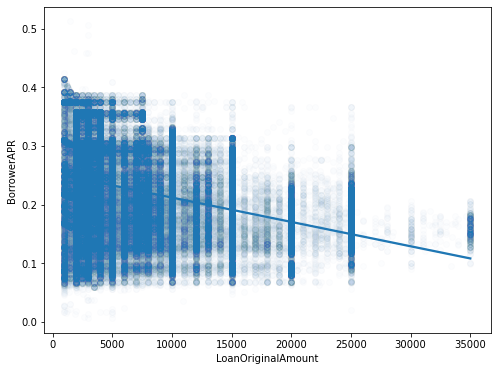

In [31]:
# scatterplot of BorrowerAPR vs Loan Amount 
plt.figure(figsize=[8,6])
sns.regplot(data=loan_dataset, x='LoanOriginalAmount', y='BorrowerAPR', scatter_kws={'alpha': 0.01})
plt.show()

#### Observation

The plot depicts that a negative correlation relationship exist Loan amoount and Borrower APR. As loan amount increases, the borrower APR reduces and vice versa

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> When BorrowerAPR was plotted against BorrowerRate, a linear relationship was observed. BorrowerAPR and BorrowerRate had a high positive correlation. This shows that the borrower rate will increase as the BorrowerAPR rate increases.
>
> BorrowerAPR and LoanOriginalAmount have a moderately negative correlation. As a result, a larger loan will have a lower borrowerAPR rate.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Loan original amount and ProsperScore rating were found to have an expected positive correlation. Higher score ratings indicate more reliable borrowers, who will consequently get access to more money. Also employed borrowers have access to more money

## Multivariate Exploration


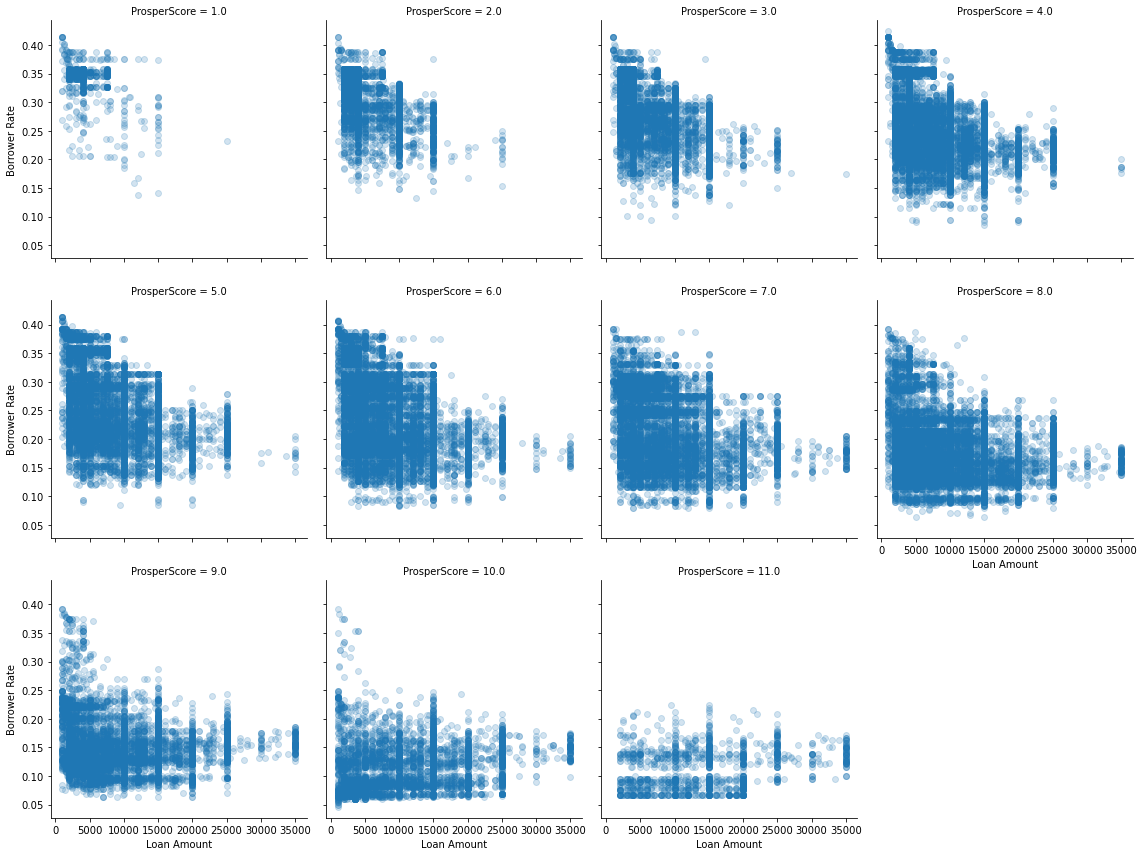

In [29]:
#Create a Facetgrid on prosper score rating relationship with BorrowerAPR and LoanOriginalAmount
g = sns.FacetGrid(data=loan_dataset, col='ProsperScore', col_wrap=4, height=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', fit_reg = False, x_jitter=0.06, scatter_kws={'alpha':0.2})
g.set_xlabels('Loan Amount')
g.set_ylabels('Borrower Rate')
plt.show()

#### Observation

Borrowers with low prosper ratings tends to have a higher Borrower Rate and also has access to lower loan amount fees. This is because borrowers with low ratings are not credit worthiness while Borrowers with high prosper ratings tend to have lower Borrower Rate also has access to higher loan amount baceause they are deem credit worthiness 

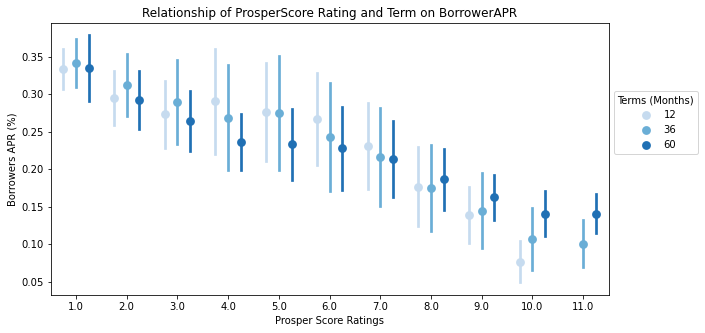

In [30]:
plt.figure(figsize=(10,5))
sns.pointplot(data=loan_dataset, x='ProsperScore', y='BorrowerAPR', hue='Term', linestyles="",
             palette='Blues', dodge=0.5, ci='sd');
plt.title('Relationship of ProsperScore Rating and Term on BorrowerAPR');
plt.xlabel('Prosper Score Ratings')
plt.ylabel('Borrowers APR (%)')
plt.legend(loc = 3, bbox_to_anchor = (1.0, 0.5), title='Terms (Months)');
plt.show()

#### Observation

Borrowers with lower ratings tends to have higher Borrowers Rate irrespective of the Terms of the loan and Borrowers with high ratings tends to have a lower Borrowers Rate ireespective of the loan. Borrowers with a score less than or equals 6 have lower borrowing rate when applying for loan with 36 months payment plan than loan with 12 and 36 months payment plan. Borrowrers with score higher than or equals to 8 have higher borrowing rate when applying for loan with 36 months payment plan than loan with 12 and 36 months payment plan

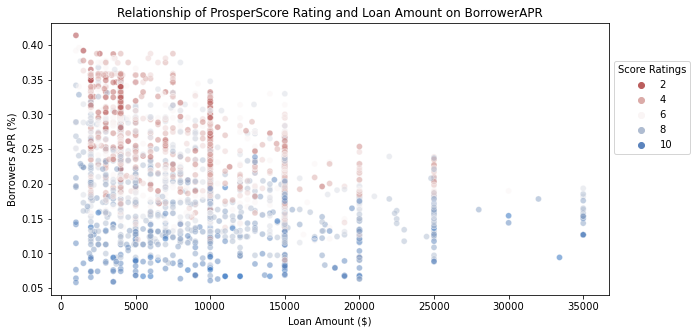

In [52]:
# Plotting thr diagram to avoid over plotting
plt.figure(figsize=(10,5))
sns.scatterplot(data=loan_sample, x='LoanOriginalAmount', y='BorrowerAPR', hue='ProsperScore',
             palette='vlag_r', alpha=0.5);
plt.title('Relationship of ProsperScore Rating and Loan Amount on BorrowerAPR');
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrowers APR (%)')
plt.legend(loc = 3, bbox_to_anchor = (1.0, 0.5), title='Score Ratings');
plt.show()

#### Observation 

Borrowers with higher score rating tends to have a favourable BorrowerAPR irrespective of the Loan amount taken while borrowers witj lower score ratings tends to have a higher BorrowerAPR irrespective of the amount taken. 



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation by performuing a multivarate exploration on Borrowers APR by looking at the impact of prosper score rating on the relationship between Borrowers Apr and Loan amount. The multivariate exploaration shows there is indeed a negative relationship between borowerAPR and Loan orignal Amount. Borrowers with low score ratings usually have access to lower loan amount whereas Borrowers with higher ratings tends to have access to higher loan amount

### Were there any interesting or surprising interactions between features?

> According to the point plots, borrowers with lower scores typically have a better rate when asking for a loan for 60 months as opposed to 12 and 36 months, while borrowers with higher scores typically have a higher rate when applying for a loan for 60 months as opposed to 12 and 36 months.

## Conclusions
>1. Most of Prosper Borrowing rate fall around 36%
>
>2. A higher proportion of low-scoring borrowers than high-scoring borrowers. This indicates that a large percentage of Prosper's loans are high risk loans.
>
>3. The most common loan type obtained by prosper borrowers is debt consolidation.
>
>4. The most frequent loan amount collected by prosper borrowers is 4k followed by 15k and 10k
>
>5. The most frequent terms of loan is 36 months (medium-term), followed by 60 months (long-term) and 12 month (short term)
>
>6. Higher BorrowerAPR rate is strongly related to higher BorrowerRate rate
>
>7. The correlation between BorrowerAPR and loan amount is moderately negative correlection. The higher the loan amount fee, the Lower the BorrowerAPR and the lower the loan amount fee. the higher the BorrowerAPR
>
>8. The majority of Prosper borrowers are employed, and the majority of these borrowers have low ratings on Prosper.
>
>9. Borrowers with lower scores typically have a better rate when asking for a loan for 60 months as opposed to 12 and 36 months, while borrowers with higher scores typically have a higher rate when applying for a loan for 60 months as opposed to 12 and 36 months.